<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Spearman_corr_all_compounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Filtered_Result_With_Detection_Frequency_02.csv')
print(df.head())
print(df.columns)
print(df.index)
# Set the index to the "Unnamed: 0" column
df = df.drop(columns=['Formula (mol ion)', 'Detection Frequency']).set_index('Unnamed: 0')
print(df.head())

                                          Unnamed: 0 Formula (mol ion)  \
0  1,2-Benzenediol, O-(4-ethylbenzoyl)-O'-proparg...          C19H16O5   
1              3,4-Methylenedioxyphenyl vinyl ketone           C10H8O3   
2                           Naphthalene, 1-isocyano-            C11H7N   
3  Oxamide, N-(3-methoxypropyl)-N'-cycloheptylide...        C13H23N3O3   
4                                  Heptane, 4-azido-           C7H15N3   

   Detection Frequency  Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  \
0             0.250000      0.000000      0.000000      0.007362   
1             0.333333      0.162008      0.073237      0.120008   
2             0.250000      0.007738      0.000000      0.000000   
3             0.500000      0.002009      0.000000      0.000000   
4             0.250000      0.000000      0.000000      0.422010   

   Auto_2_gp_df  Auto_1_gp_df  Zafira_2_gp_df  Zafira_1_gp_df  Auto_5_pm_df  \
0      0.000000      0.000000        0.006410        0.018978      

In [3]:
def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly
    correlated variables are next to eachother

    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix

    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold,
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)

    if not inplace:
        corr_array = corr_array.copy()

    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

In [4]:
compound_columns = [col for col in df.columns if '_gp_df' in col]

# Creating a new dataframe with only the relevant columns
compound_df = df[compound_columns]

# Calculating the Spearman rank correlation
correlation_matrix_gp_samples = compound_df.corr(method='spearman')

# Displaying the result
print(correlation_matrix_gp_samples)

                Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  Auto_2_gp_df  \
Auto_5_gp_df        1.000000      0.023867      0.163849      0.113753   
Auto_4_gp_df        0.023867      1.000000      0.205776      0.122529   
Auto_3_gp_df        0.163849      0.205776      1.000000      0.113041   
Auto_2_gp_df        0.113753      0.122529      0.113041      1.000000   
Auto_1_gp_df        0.164991      0.085119      0.094311      0.167389   
Zafira_2_gp_df     -0.072425     -0.074490     -0.091854      0.032966   
Zafira_1_gp_df     -0.160308      0.012975     -0.008010     -0.059886   

                Auto_1_gp_df  Zafira_2_gp_df  Zafira_1_gp_df  
Auto_5_gp_df        0.164991       -0.072425       -0.160308  
Auto_4_gp_df        0.085119       -0.074490        0.012975  
Auto_3_gp_df        0.094311       -0.091854       -0.008010  
Auto_2_gp_df        0.167389        0.032966       -0.059886  
Auto_1_gp_df        1.000000       -0.187273       -0.138802  
Zafira_2_gp_df     -0.187273 

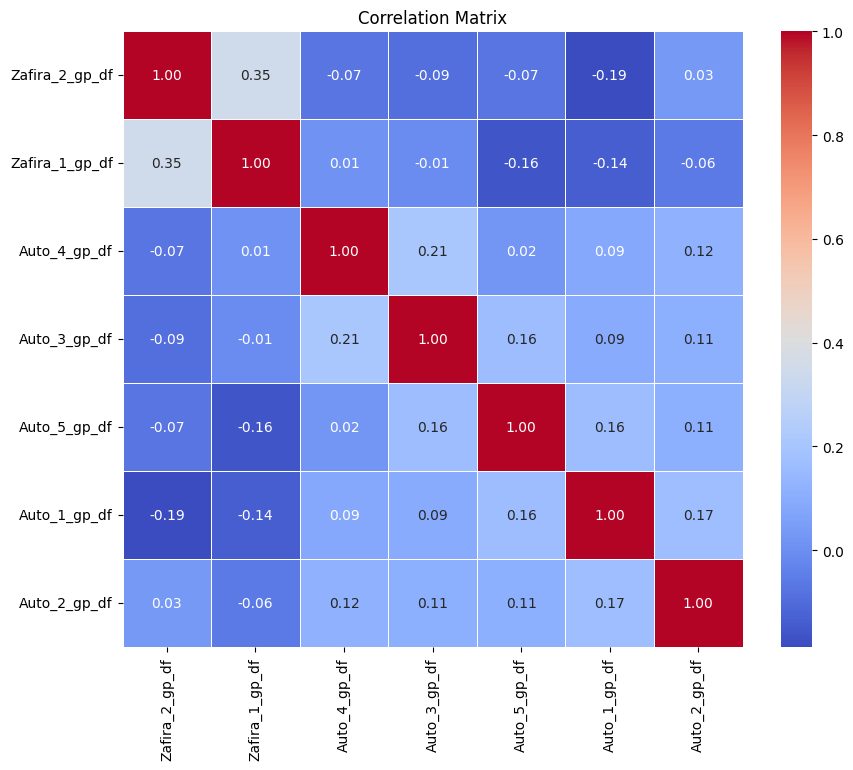

In [5]:
correlation_df_gp = correlation_matrix_gp_samples.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_corr(correlation_df_gp), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_gp_all_compounds.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Calculate Spearman rank correlation matrix
correlation_matrix_total = df.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix_total)

                Auto_5_gp_df  Auto_4_gp_df  Auto_3_gp_df  Auto_2_gp_df  \
Auto_5_gp_df        1.000000      0.023867      0.163849      0.113753   
Auto_4_gp_df        0.023867      1.000000      0.205776      0.122529   
Auto_3_gp_df        0.163849      0.205776      1.000000      0.113041   
Auto_2_gp_df        0.113753      0.122529      0.113041      1.000000   
Auto_1_gp_df        0.164991      0.085119      0.094311      0.167389   
Zafira_2_gp_df     -0.072425     -0.074490     -0.091854      0.032966   
Zafira_1_gp_df     -0.160308      0.012975     -0.008010     -0.059886   
Auto_5_pm_df       -0.010381     -0.028145     -0.160569     -0.090206   
Auto_4_pm_df       -0.071526     -0.102052     -0.178880     -0.112894   
Auto_3_pm_df       -0.087322     -0.065076     -0.162660     -0.048881   
Auto_2_pm_df       -0.074135      0.026836     -0.094214     -0.077950   
Auto_1_pm_df       -0.013912     -0.250173     -0.187399     -0.193364   

                Auto_1_gp_df  Zafira_

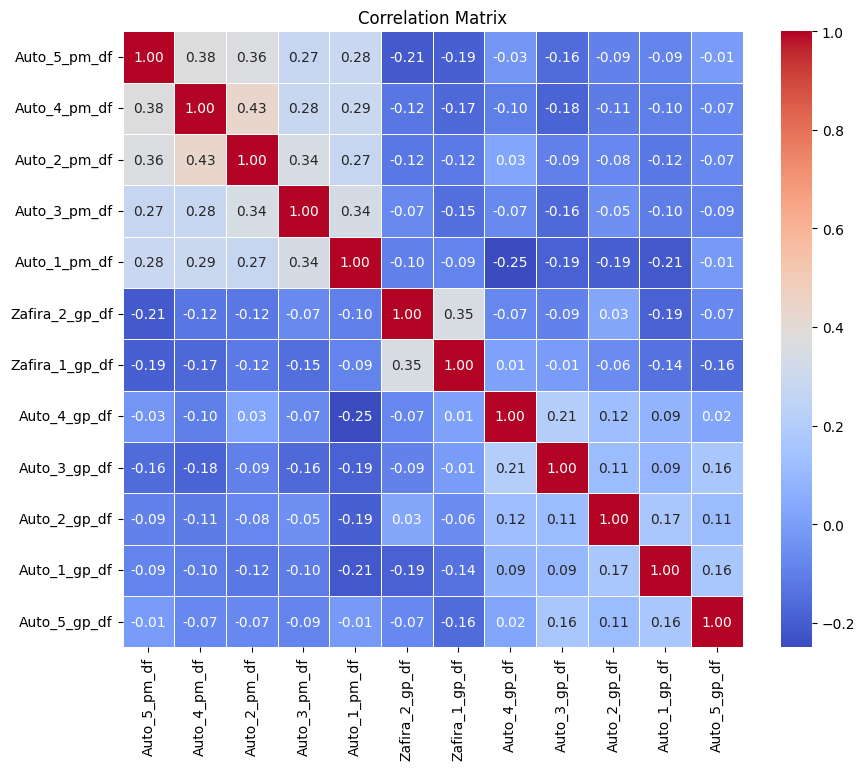

In [7]:
correlation_df_gp = correlation_matrix_total.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_corr(correlation_df_gp), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_all_compounds.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_transposed = df.transpose()

# Calculate Spearman rank correlation matrix
correlation_matrix_compounds = df_transposed.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix_compounds)

Unnamed: 0                                          Sulfurous acid, di(2-ethylhexyl) ester  \
Unnamed: 0                                                                                   
Sulfurous acid, di(2-ethylhexyl) ester                                            1.000000   
Piperazine, 1,1'-(1,2-diphenylethane-1,2-diyl)b...                                0.634043   
1,2-Benzenediol, O-acetoxyacetyl-O'-(4-butylben...                                0.080443   
Benzoic acid, 4-(4-butylcyclohexyl)-, 2,3-dicya...                                0.601405   
1,2-Benzenediol, O,O'-di(4-butylbenzoyl)-                                         0.038298   
...                                                                                    ...   
Heptane, 3-ethyl-                                                                -0.268085   
Tetraethoxymethane                                                               -0.362866   
Triisopropylphosphate                                       

In [ ]:
plt.figure(figsize=(120, 100))

# Create a heatmap
sns.heatmap(correlation_matrix_compounds, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_compounds_analysis.png', dpi=300, bbox_inches='tight')
#plt.show()

Error in callback <function flush_figures at 0x7849e28f5a20> (for post_execute):


KeyboardInterrupt: 

In [ ]:
correlation_matrix_compounds_reordered = cluster_corr(correlation_matrix_compounds)

plt.figure(figsize=(130, 90))

# Create a heatmap
sns.heatmap(correlation_matrix_compounds_reordered, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.savefig(f'/content/drive/My Drive/Spearmann_c_analysis/Spearmanc_heat_compounds_analysis_ordered.png', dpi=300, bbox_inches='tight')
#plt.show()

KeyboardInterrupt: 